# 几何变换

[Geometric Transformations of Images](https://docs.opencv.org/4.7.0/da/d6e/tutorial_py_geometric_transformations.html)

几何变换是指将一幅图像映射到另外一幅图像内的操作。可以这样分类(包含关系)：

$$
透视变换
\begin{cases}
  升维到齐次坐标系(Homogeneous Coordinates) \\
  仿射变换 
    \begin{cases} 增加平移 \\ 线性变换
      \begin{cases} 缩放 \\ 旋转 \\ 对称 \end{cases}
    \end{cases} 
\end{cases}
$$

还可以这样分类

- __刚体变换__ ：平移+旋转，只改变物体的位置，不改变形状
- __仿射变换__ ：改变物体的位置和形状，但是保持平直性
- __投影变换__ ：彻底改变物体的位置和形状


OpenCV 提供了多个与映射有关的函数，根据 OpenCV 函数的不同，可将映射关系划分为缩放、翻转、仿射变换、透视、重映射等。这些函数使用起来方便灵活，能够高效地完成图像的映射。


## 目标
- 学习应用不同的几何变换到图像，如平移，旋转，仿射变换等
- 学习函数: [cv.getPerspectiveTransform](https://docs.opencv.org/4.7.0/da/d54/group__imgproc__transform.html#ga20f62aa3235d869c9956436c870893ae)

```
Mat cv::getPerspectiveTransform	(
 	InputArray 	src,
 	InputArray 	dst,
 	int  		solveMethod = DECOMP_LU 
)		
Python: cv.getPerspectiveTransform( src, dst[, solveMethod] ) -> retval

```

从四对对应的点计算一个透视变换

The function calculates the 3×3 matrix of a perspective transform so that:
$$
{
\displaystyle {\begin{bmatrix}t_{i}x′\\t_{i}x′\\t\end{bmatrix}} =
𝚖𝚊𝚙\_𝚖𝚊𝚝𝚛𝚒𝚡 ⋅{\begin{bmatrix}x_{i}\\y_{i}\\1\end{bmatrix}}
}
$$
where
- dst(i)=(x′i,y′i)
- src(i)=(xi,yi)
- i=0,1,2,3

参考 [图像变换基础：齐次坐标系](https://mp.weixin.qq.com/s/VDMJtK1KWX6nTvBzDOOY5g)

## 基础概念

深度阅读
- <https://mp.weixin.qq.com/s/hd7mw74Q6UsIWnO0CIqKmg> 几何变换的层次——投影变换，仿射变换，度量变换和欧几里德变换
- <https://mp.weixin.qq.com/s/h7Hz5XVdFioByXmbCgqlKA> 几何变换——关于透视变换和仿射变换以及齐次坐标系的讨论
    
### 欧几里德空间(Euclidean Space) 与 投影空间(Projective Space)

在欧几里德空间里，平行线相交于无限远的点处。我们把平行线相交于的无限远的点，称之为理想点(Ideal point)。

在投影空间中，所有的线最终都能够相交了。因为所有的理想点都有着相同的距离，所以在二维的投影空间中，所有的平行线其实都是交于由所有理想点组成的“理想直线”上的。同样的，在三维投影空间中，所有的平行面都交于一个“理想平面”。

在投影空间中，我们用齐次坐标去表示点，把空间中的点看成是等价的，这样就不存在普通点与理想点的区别了，在这个空间中，所有的直线都会相交。

### 坐标表达

在 **笛卡尔坐标系** 中，每个点可以用 `(x, y)` 的形式表示；在 **齐次坐标系** 中，则变成了 `(x', y', w)`，其中 `x = x'/w, y = y'/w` 。通常，可以设 `w=1`

### 投影变换

投影变换可以细分为 仿射变换(affine transform) 和 透视变换(perspective transform)，以及 广义的投影变换(general projective transform)。

## 转换函数

OpenCV 提供了两个转换函数

- [cv.warpAffine](https://docs.opencv.org/4.7.0/da/d54/group__imgproc__transform.html#ga0203d9ee5fcd28d40dbc4a1ea4451983) 使用 2x3 变换矩阵作为输入；
- [cv.warpPerspective](https://docs.opencv.org/4.7.0/da/d54/group__imgproc__transform.html#gaf73673a7e8e18ec6963e3774e6a94b87) 使用 3x3 变换矩阵作为输入。

### [API of cv2.warpAffine](https://docs.opencv.org/4.7.0/da/d54/group__imgproc__transform.html#ga0203d9ee5fcd28d40dbc4a1ea4451983)
```

void cv::warpAffine(	InputArray 	src,
                        OutputArray 	dst,
                        InputArray 	M,
                        Size 		dsize,
                        int 		flags = INTER_LINEAR,
                        int 		borderMode = BORDER_CONSTANT,
                        const Scalar & 	borderValue = Scalar() 
                    )		
Python: cv.warpAffine(src, M, dsize[, dst[, flags[, borderMode[, borderValue]]]]) -> dst

```
* `src` 表示原始输入图像
* `M`	2 * 3 的变换矩阵
* `dsize` 输出图像的尺寸：宽 x 高

M 是 2*3 变换矩阵 $$
M = \begin{bmatrix}
M_{11} & M_{12} & M_{13} \\
M_{21} & M_{22} & M_{23}
\end{bmatrix}
$$

𝚍𝚜𝚝(x,y)=𝚜𝚛𝚌(𝙼11x+𝙼12y+𝙼13, 𝙼21x+𝙼22y+𝙼23)

仿射变换可以实现平移、旋转

In [1]:

import time
t0 = time.time()

   
    
# 初始化 opencv
import cv2
print(f"load opencv lib used {(time.time() - t0):.2f}s")

# https://github.com/opencv/opencv/tree/4.x/samples/data
# cv2.samples.addSamplesDataSearchPath("./images")
picture_file = cv2.samples.findFile("images/starry_night.jpg")
print(f"locate starry_night.jpg: {picture_file}")

import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

# Include plot_util.py from local path
from plot_util import subplot

load opencv lib used 0.22s
locate starry_night.jpg: images/starry_night.jpg


## 1. 缩放

[API of cv2.resize](https://docs.opencv.org/4.7.0/da/d54/group__imgproc__transform.html#ga47a974309e9102f5f08231edc7e7529d)
```
void cv::resize	(   InputArray 	src,
                    OutputArray dst,
                    Size 	dsize,
                    double 	fx = 0,
                    double 	fy = 0,
                    int 	interpolation = INTER_LINEAR 
                )		
Python: cv.resize(src, dsize[, dst[, fx[, fy[, interpolation]]]]) -> dst
```

* `src` 表示原始输入图像。
* `dst` 表示输出图像，与原始输入图像具有同样的数据类型和深度，size由dsize指定，或者通过src.size()，fx，fy计算得到。
* `dsize` 输出图像dst的尺寸，当设置为None时输出图像的尺寸由src.size()，fx，fy计算得到。
* `fx` 是输出图像水平方向的缩放系数。
* `fy` 是输出图像垂直方向的缩放系数。
* `interpolation` 差值方法，[InterpolationFlags](https://docs.opencv.org/4.7.0/da/d54/group__imgproc__transform.html#ga5bb5a1fea74ea38e1a5445ca803ff121)。

插值算法(interpolation):

- INTER_AREA：适合于缩小
- INTER_CUBIC：双三次插值，适合于缩放，较慢
- INTER_LINEAR：线性插值，适合于缩放，较快


Shape: Original = (600, 752, 3) Resize = (1200, 1504, 3)


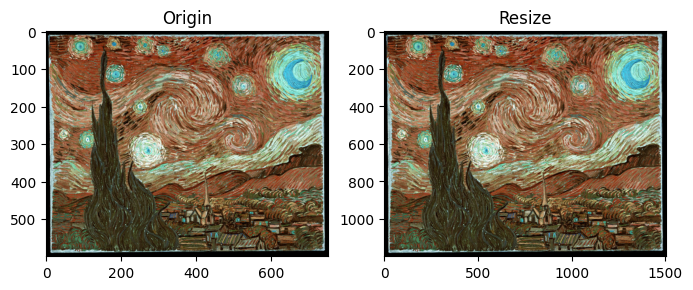

In [2]:
img = cv2.imread(picture_file)
res = cv2.resize(img, None, fx=2, fy=2, interpolation=cv2.INTER_CUBIC)
# equals to res = cv2.resize(img, (2 * w, 2 * h), interpolation=cv2.INTER_CUBIC), h, w = img.shape[:2]

rows, columns = 1, 2
subplot(rows, columns, [img, res], ["Origin", "Resize"], scale=4, axis_off=False)

print("Shape: Original =", img.shape, "Resize =", res.shape)

In [3]:
# 比较插值算法耗时：放大2倍时相差不大，且都在毫秒级
tic = time.time()
res = cv2.resize(img, None, fx=2, fy=2, interpolation=cv2.INTER_CUBIC)
toc = time.time()
print("Original: ", img.shape, "Resize: ", res.shape, "Time kills: ", toc -tic)

tic = time.time()
res = cv2.resize(img, None, fx=2, fy=2, interpolation=cv2.INTER_LINEAR)
toc = time.time()
print("Original: ", img.shape, "Resize: ", res.shape, "Time kills: ", toc -tic)


Original:  (600, 752, 3) Resize:  (1200, 1504, 3) Time kills:  0.002315044403076172
Original:  (600, 752, 3) Resize:  (1200, 1504, 3) Time kills:  0.0009920597076416016


## 2. Translation(平移)


### Augmented Matrix(增广矩阵) 

- <https://en.wikipedia.org/wiki/Augmented_matrix>

在线性代数中，增广矩阵是通过将两个给定矩阵的列相加而得到的矩阵，通常是为了对每个给定矩阵执行相同的初等行运算。

给定矩阵 A 和 B

$$
{\displaystyle A={\begin{bmatrix}A_{11}&A_{12}&A_{13}\\A_{21}&A_{22}&A_{23}\\A_{31}&A_{32}&A_{33}\end{bmatrix}},\quad B={\begin{bmatrix}B_{11}\\B_{21}\\B_{31}\end{bmatrix}},}
$$

the augmented matrix (A|B) is written as
$$
{\displaystyle (A|B)=\left[{\begin{array}{ccc|c}1&0&0&x\\0&1&0&y\\0&0&1&z\end{array}}\right].}
$$

这在求解线性方程组时很有用。

以上是三阶的增广矩阵，可以抽象为 n 阶：

$$ M = \begin{bmatrix}
  I & \vec {b} \\
  0,...,0 & 1 
\end{bmatrix}
$$

其中，$\ I$ 表示了一个单位矩阵，$\vec {b}$ 表示了一个平移变换

### M(2*3 变换矩阵) 的取值

2 阶的增广矩阵
$$
{\displaystyle (A|B)=\left[{\begin{array}{ccc|c}1&0&x\\0&1&y\\0&0&1\end{array}}\right]}
$$

M 取此矩阵的第1第2行：
$$ {\displaystyle
M = \begin{bmatrix}
M_{11} & M_{12} & M_{13} \\
M_{21} & M_{22} & M_{23}
\end{bmatrix} = \begin{bmatrix}
0 & 1 & x \\
1 & 0 & y
\end{bmatrix}
}
$$

Original:  (600, 752, 3) Translation:  (600, 752, 3)


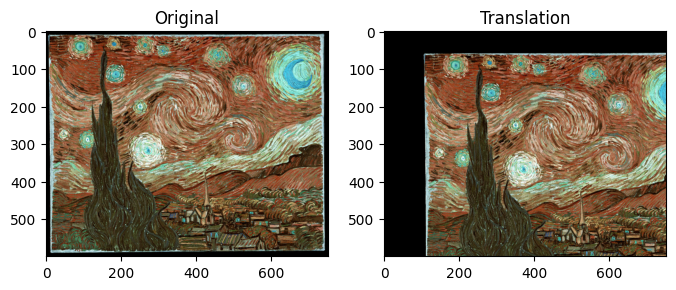

In [4]:
# img = cv2.imread(picture_file)

rows, cols = img.shape[:2]
M = np.float32([[1, 0, 100], [0, 1, 50]]) # 平移变换矩阵
res = cv2.warpAffine(img, M, (cols, rows)) # 大小不变
# cv2.imshow('res', res)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

rows, columns = 1, 2
subplot(rows, columns, [img, res], ["Original", "Translation"], scale=4, axis_off=False)

print("Original: ", img.shape, "Translation: ", res.shape)

## 3. 旋转

- <https://blog.csdn.net/ooooocj/article/details/112491183>

我们来看看各种情况的旋转：

1、线性旋转：
 * 绕 x 轴旋转
 * 绕 y 轴旋转
 * 绕 z 轴旋转

2、中心旋转：以指定点为中心进行旋转

绕 x 轴旋转的变换矩阵：

$${\displaystyle A^{\prime} = \left[\begin{array}{cccc}
1 & 0 & 0 & 0 \\
0 & \cos \theta & -\sin \theta & 0 \\
0 & \sin \theta & \cos \theta & 0 \\
0 & 0 & 0 & 1
\end{array}\right]}$$

我们来看看旋转变换矩阵 $M$，旋转中心$(x,y)，$旋转角度$\theta$，则旋转可以拆解为：
- 以旋转中心为新的原点，即将旋转中心平移到图像原点
- 按照新的原点进行旋转$\theta$角度
- 再将旋转中心平移回原来的位置

如此，便可以将旋转表示为：
$$
M=\begin{bmatrix}
1 & 0 & x \\
0 & 1 & y \\
0 & 0 & 1
\end{bmatrix}
\begin{bmatrix}
cos\theta & sin\theta & 0 \\
-sin\theta & cos\theta & 0 \\
0 & 0 & 1
\end{bmatrix}
\begin{bmatrix}
1 & 0 & -x \\
0 & 1 & -y \\
0 & 0 & 1
\end{bmatrix}=
\begin{bmatrix}
cos\theta & sin\theta & (1-cos\theta)*x-sin\theta*y \\
-sin\theta & cos\theta & sin\theta*x+(1-cos\theta)y \\
0 & 0 & 1
\end{bmatrix}
$$

opencv中$M$ 取此矩阵的第1第2行：
$$ 
M = \begin{bmatrix}
M_{11} & M_{12} & M_{13} \\
M_{21} & M_{22} & M_{23}
\end{bmatrix} = 
\begin{bmatrix}
cos\theta & sin\theta & (1-cos\theta)*x-sin\theta*y \\
-sin\theta & cos\theta & sin\theta*x+(1-cos\theta)y
\end{bmatrix}
$$

OpenCV 提供了可调节旋转中心的缩放旋转

实现的图像旋转一个角度θ的变换矩阵：

$${\displaystyle M = \left[\begin{array}{cccc}
\cos \theta & -\sin \theta\\
\sin \theta & \cos \theta\\
\end{array}\right]}$$

这样你就可以在任何你喜欢的位置旋转。修改后的变换矩阵由

$${\displaystyle \left[\begin{array}{cccc}
\alpha, & \beta, & (1 - \alpha)*center.x - \beta * center.y \\
-\beta, & \alpha, & \beta * center.x + (1 - \alpha)*center.y \\
\end{array}\right]}$$

```
α=scale⋅cosθ,
β=scale⋅sinθ
```

为了找到这个变换矩阵，OpenCV提供了一个函数 [cv.getRotationMatrix2D](https://docs.opencv.org/4.7.0/da/d54/group__imgproc__transform.html#gafbbc470ce83812914a70abfb604f4326)

```
Mat cv::getRotationMatrix2D	(	Point2f 	center,
								double 	angle,
								double 	scale 
)		

Python: cv.getRotationMatrix2D( center, angle, scale) -> retval
```


看看下面的例子，它将图像围绕中心旋转90度，放大 0.8 倍。

M:  [[ 4.8985872e-17  8.0000000e-01  1.3590000e+02]
 [-8.0000000e-01  4.8985872e-17  5.9990000e+02]]
Original:  (600, 752, 3) Rotation:  (600, 752, 3)


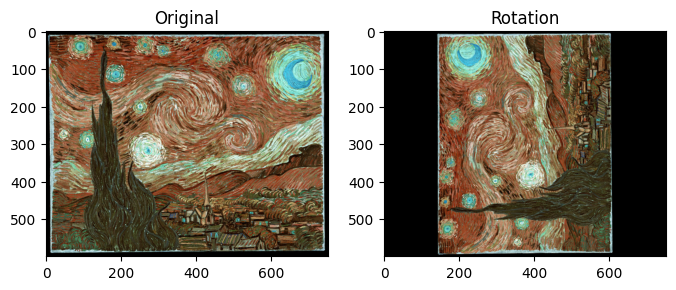

In [5]:
h, w = img.shape[:2]
M = cv2.getRotationMatrix2D(center=((w - 1) / 2.0, (h - 1) / 2.0),angle=90, scale=0.8)
# cv2.getRotationMatrix2D的第一个参数为旋转中心 第二个为旋转角度  第三个为旋转后的缩放因子(正数逆时针，负数顺时针)
# 可以通过设置旋转中心，缩放因子，以及窗口大小来防止旋转后超出边界的问题
print("M: ", M)
res = cv2.warpAffine(img, M, (w, h))

rows, columns = 1, 2
subplot(rows, columns, [img, res], ["Original", "Rotation"], scale=4, axis_off=False)

print("Original: ", img.shape, "Rotation: ", res.shape)

## 4. Affine Transformation(仿射变换)

- <https://xiulian.blog.csdn.net/article/details/103845581>

在仿射变换中 原图中所有的平行线在结果图像中同样平行，保证平直性。

为了创建这个矩阵，需要从原图像中找到三个点以及他们在输出图像中的位置。

然后 cv2.getAffineTransform 会创建一个 2x3 的矩阵，最后会把这个矩阵传给函数 cv2.warpAffine。

$$
M = 
\begin{bmatrix}
A & \vec {b} \\
0,...,0 & 1 
\end{bmatrix}
$$
其中，$\ A$表示了一个线性变换，$\vec {b}$表示了一个平移变换

M 是仿射变换矩阵，只是在程序中省略了矩阵的最后一行

(600, 752, 3)
M:  [[  1.26666667   0.6        -83.33333333]
 [ -0.33333333   1.          66.66666667]]
Original:  (600, 752, 3) Affine:  (600, 752, 3)


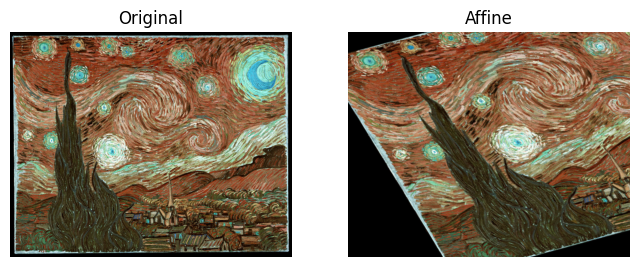

In [6]:
rows, cols, ch = img.shape # 图像的宽对应的是列数, 高对应的是行数。
print(img.shape)

pts1 = np.float32([[50, 50], [200, 50], [50, 200]]) # 原图的点
pts2 = np.float32([[10, 100], [200, 50], [100, 250]]) # 原图像三个点在变换后相应的坐标

M = cv2.getAffineTransform(pts1, pts2)
print("M: ", M)
res = cv2.warpAffine(img, M, (cols, rows))

rows, columns = 1, 2
subplot(rows, columns, [img, res], ["Original", "Affine"], scale=4)

print("Original: ", img.shape, "Affine: ", res.shape)

## 5. Perspective Transformation(透视变换)

- <https://blog.csdn.net/sinat_29957455/article/details/104281693>
- <https://blog.csdn.net/m0_43609475/article/details/112847314>
- <https://zhuanlan.zhihu.com/p/74597564>
- <https://zhuanlan.zhihu.com/p/373969867>

对于透视变换，需要一个 3x3 变换矩阵（8个自由度）。
在变换前后直线还是直线。

所以构建一个变换矩阵需要在输入图像上找 4 个点，以及他们在输出图像上对应的位置。

四个点中的任意三个都不能共线。这个变换矩阵可以用函数 `cv2.getPerspectiveTransform()` 构建。
然后把这个矩阵传给函数 `cv2.warpPerspective`。

### 原理解析
透视变换（Perspective Transformation）的本质是将图像投影到一个新的视平面(Viewing Plane)，也称作投影映射(Projective Mapping)。
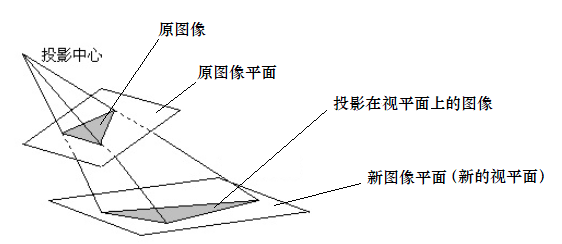
$$
\begin{bmatrix}
x^{\prime} \\
y^{\prime} \\
\omega^{\prime}
\end{bmatrix} = 
\begin{bmatrix}
a_{11} & a_{12} & a_{13} \\
a_{21} & a_{22} & a_{23} \\
a_{31} & a_{32} & a_{33}
\end{bmatrix}
\begin{bmatrix}
x \\
y \\
\omega
\end{bmatrix}
$$

通常，在齐次坐标系中可以设$ \omega=\omega^{\prime}=1 $。

透视变换矩阵可以理解为：

$$
T = 
\begin{bmatrix}
a_{11} & a_{12} & a_{13} \\
a_{21} & a_{22} & a_{23} \\
a_{31} & a_{32} & a_{33}
\end{bmatrix} = 
\left[
\begin{array}{cc|c}
a_{11} & a_{12} & a_{13} \\
a_{21} & a_{22} & a_{23} \\ \hline
a_{31} & a_{32} & a_{33}
\end{array}
\right] = 
\begin{bmatrix}
T_{1} & T_{2} \\
T_{3} & a_{33}
\end{bmatrix}
$$

其中，$$T_{1} = \begin{bmatrix}a_{11} & a_{12} \\a_{21} & a_{22}\end{bmatrix}, T_{2} = \begin{bmatrix}a_{13} \\a_{23} \end{bmatrix}, T_{3} = \begin{bmatrix}a_{31} & a_{32} \end{bmatrix}, a_{33} = 1$$

$T_{1}$表示图像的线性变换，$T_{2}$表示图像的平移变换，$T_{3}$表示图像的透视变换。

[56. 65.]
[368.  52.]
[ 28. 387.]
[389. 390.]
M:  [[ 1.05587376e+00  9.18151097e-02 -6.50969128e+01]
 [ 4.69010049e-02  1.12562412e+00 -7.57920240e+01]
 [ 1.83251448e-04  5.13337001e-04  1.00000000e+00]]
Original:  (600, 752, 3) Perspective:  (300, 300, 3)


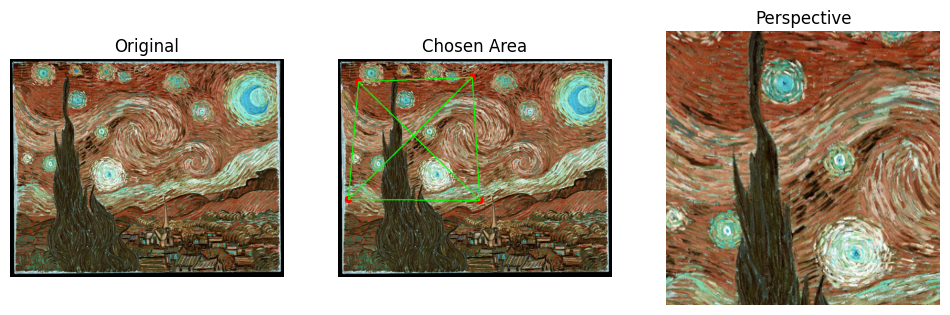

In [7]:
# from collections import defaultdict

def get_img(img: np.array, pts: np.array):
    points = []
    for pt in pts:
        print(pt)
        p = (int(pt[0]), int(pt[1]))
        points.append(p)
        cv2.circle(img, p, 10, (255, 0, 0), -1)
#     s_e = defaultdict(list)
#     for s in points:
#         for e in points:
#             if e != s:
#                 s_e[s].append(e)
#     print(s_e)
    for s in points: # todo 框选区域可以优化
        for e in points:
            if e != s:
                cv2.line(img, s, e, (0, 255, 0), 2)
    return img

pts1 = np.float32([[56, 65], [368, 52], [28, 387], [389, 390]])
pts2 = np.float32([[0, 0], [300, 0], [0, 300], [300, 300]])

img_pts1 = get_img(img.copy(), pts1)
M = cv2.getPerspectiveTransform(pts1, pts2)
res = cv2.warpPerspective(img, M, (300, 300))
print("M: ", M)

rows, columns = 1, 3
subplot(rows, columns, [img, img_pts1, res], ["Original","Chosen Area", "Perspective"], scale=4)

print("Original: ", img.shape, "Perspective: ", res.shape)